# Image Data Augmentation with Keras

![Horizontal Flip](assets/horizontal_flip.jpg)

#  Import Libraries

In [2]:
%matplotlib inline

import os
import numpy as np
import tensorflow as tf

from PIL import Image
from matplotlib import pyplot as plt

print('Using TensorFlow', tf.__version__)

Using TensorFlow 2.2.0


#  Rotation

In [3]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range=40
)

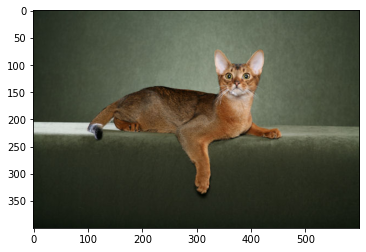

In [4]:
image_path = 'images/train/cat/cat.jpg'

plt.imshow(plt.imread(image_path));

Found 1 images belonging to 1 classes.


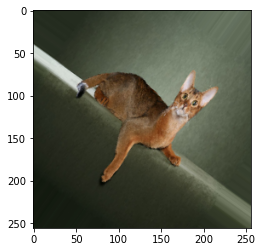

In [5]:
x, y = next(generator.flow_from_directory('images', batch_size=1))
plt.imshow(x[0].astype('uint8'));

#  Width and Height Shifts

In [6]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(width_shift_range=[-100, -50, 0, 50, 100],
                                                           height_shift_range=[-50, 0, 50])

Found 1 images belonging to 1 classes.


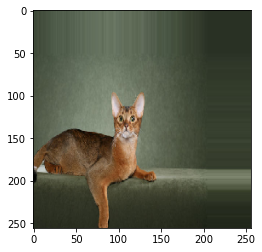

In [7]:
x, y = next(generator.flow_from_directory('images', batch_size=1))
plt.imshow(x[0].astype('uint8'));

#  Brightness

Found 1 images belonging to 1 classes.


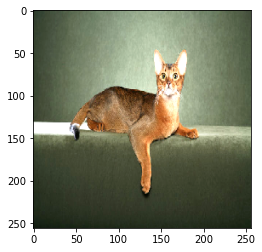

In [8]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(brightness_range=(0.5, 2.0))

x, y = next(generator.flow_from_directory('images', batch_size=1))
plt.imshow(x[0].astype('uint8'));

#  Shear Transformation

Found 1 images belonging to 1 classes.


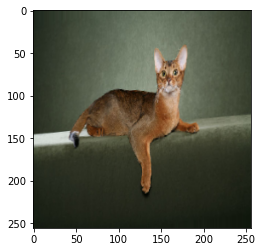

In [9]:
#It means the bottom coordinates will remain at same position. Only the top two coordinates will change.

generator = tf.keras.preprocessing.image.ImageDataGenerator(
    shear_range=40
)

x, y = next(generator.flow_from_directory('images', batch_size=1))
plt.imshow(x[0].astype('uint8'));

#  Zoom

Found 1 images belonging to 1 classes.


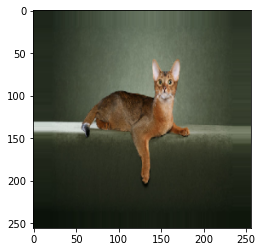

In [10]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(
    zoom_range=[0.5, 1.2]
)

x, y = next(generator.flow_from_directory('images', batch_size=1))
plt.imshow(x[0].astype('uint8'));

#  Channel Shift

Found 1 images belonging to 1 classes.


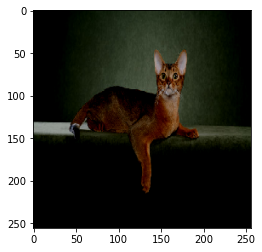

In [11]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(
    channel_shift_range=100
)

x, y = next(generator.flow_from_directory('images', batch_size=1))
plt.imshow(x[0].astype('uint8'));

In [12]:
x.mean()

16.812311

In [13]:
np.array(Image.open(image_path)).mean()

69.57810416666666

#  Flips

Found 1 images belonging to 1 classes.


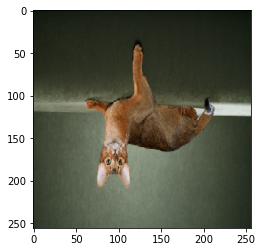

In [14]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(
    horizontal_flip=True,
    vertical_flip=True
)

x, y = next(generator.flow_from_directory('images', batch_size=1))
plt.imshow(x[0].astype('uint8'));

#  Normalization

### Featurewise

In [16]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
x_mean = x_train.mean()
x_std = x_train.std()
x_train_norm = (x_train - x_mean)/x_std

generator = tf.keras.preprocessing.image.ImageDataGenerator(
    featurewise_center=True,
    featurewise_std_normalization=True
)

generator.fit(x_train)

170500096/170498071 [==============================] - 156s 1us/step


In [17]:
x, y = next(generator.flow(x_train, y_train, batch_size=1))
print(x.mean(), x.std(), y)
print(x_train.mean())

0.12488022 0.86746776 [[3]]
120.70756512369792


### Samplewise

In [18]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(
    samplewise_center=True,
    samplewise_std_normalization=True
)

x, y = next(generator.flow(x_train, y_train, batch_size=1))
print(x.mean(), x.std(), y)

1.9868216e-08 1.0 [[9]]


#  Rescale and Preprocessing Function

In [19]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1/255.,
    preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input
)

In [20]:
x, y = next(generator.flow(x_train, y_train, batch_size=1))

In [21]:
print(x.mean(), x.std(), y)

0.0001467886 0.001139679 [[2]]


#  Using in Model Training

In [22]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(
    preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input,
    horizontal_flip=True,
    rotation_range=20
)

In [23]:
model = tf.keras.models.Sequential([
    tf.keras.applications.mobilenet_v2.MobileNetV2(
        include_top=False, input_shape=(32,32,3),
        pooling='avg'),
    tf.keras.layers.Dense(10, activation='softmax')
])
model.compile(loss='sparse_categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

9412608/9406464 [==============================] - 3s 0us/step


In [24]:
_ = model.fit(generator.flow(x_train, y_train, batch_size=32),
              epochs=5, steps_per_epoch=100
)


Epoch 1/5
100/100 [==============================] - 1s 14ms/step - loss: 2.5335 - accuracy: 0.1097
Epoch 2/5
100/100 [==============================] - 1s 14ms/step - loss: 1.9093 - accuracy: 0.1084
Epoch 3/5
100/100 [==============================] - 1s 14ms/step - loss: 1.7655 - accuracy: 0.0962
Epoch 4/5
100/100 [==============================] - 1s 14ms/step - loss: 1.6952 - accuracy: 0.0841
Epoch 5/5
100/100 [==============================] - 1s 14ms/step - loss: 1.6018 - accuracy: 0.0922
